In [2]:
import numpy as np # linear algebra
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.metrics import roc_curve
import sklearn.metrics

In [3]:
w_df = pd.read_csv('../Data/weatherAUS.csv')

In [4]:
w_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
w_df.shape

(145460, 23)

In [6]:
w_df.info

<bound method DataFrame.info of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W

In [7]:
w_df.nunique().sort_values(ascending=False)

Date             3436
Rainfall          681
Pressure3pm       549
Pressure9am       546
MaxTemp           505
Temp3pm           502
Temp9am           441
MinTemp           389
Evaporation       358
Sunshine          145
Humidity9am       101
Humidity3pm       101
WindGustSpeed      67
Location           49
WindSpeed3pm       44
WindSpeed9am       43
WindDir3pm         16
WindDir9am         16
WindGustDir        16
Cloud9am           10
Cloud3pm           10
RainToday           2
RainTomorrow        2
dtype: int64

We can see that the Date Table should be a Datetime datatype but now this is a object, so we start with it and clean it first.

1-Feature Engineering for Date Variable

In [8]:
w_df['Date'] = pd.to_datetime(w_df['Date'])

In [9]:
w_df['Year'] = w_df['Date'].dt.year
w_df['Month'] = w_df['Date'].dt.month
w_df['Day'] = w_df['Date'].dt.day

w_df.drop('Date', axis=1, inplace=True)

In [10]:
w_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


Exploring Numerical Variables

In [11]:
numerical = [var for var in w_df.columns if w_df[var].dtype != 'O']
numerical.remove('Month')
numerical.remove('Year')
numerical.remove('Day')

In [12]:
w_df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


 Exploring Outliers in Numerical variables¶

In [13]:
display(w_df[numerical].describe())

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


By above table we can say there are outlier in Rainfall,Evaporation,WindSpeed9am,WindSpeed3pm because MEAN and MAX values have a lot of difference. Let's also try to visualise it

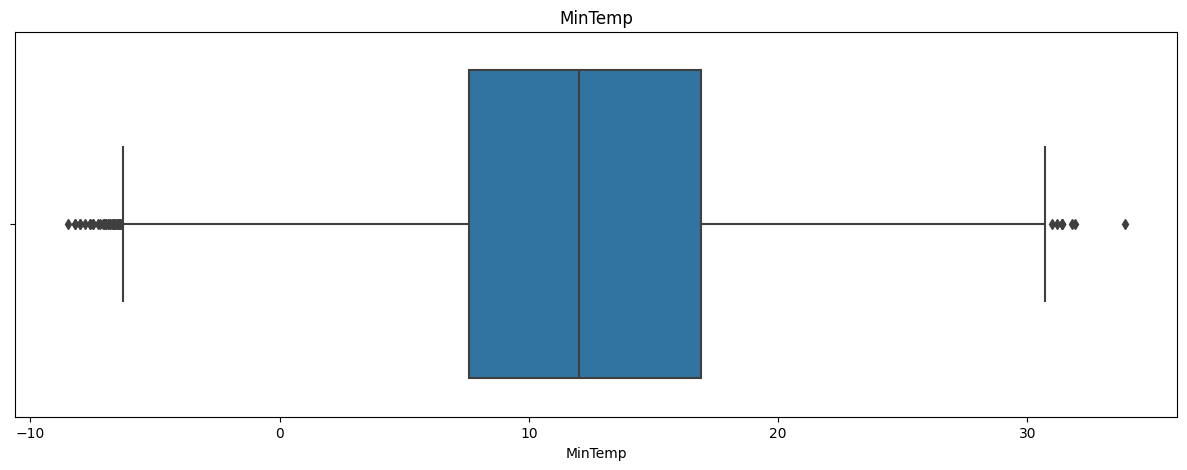

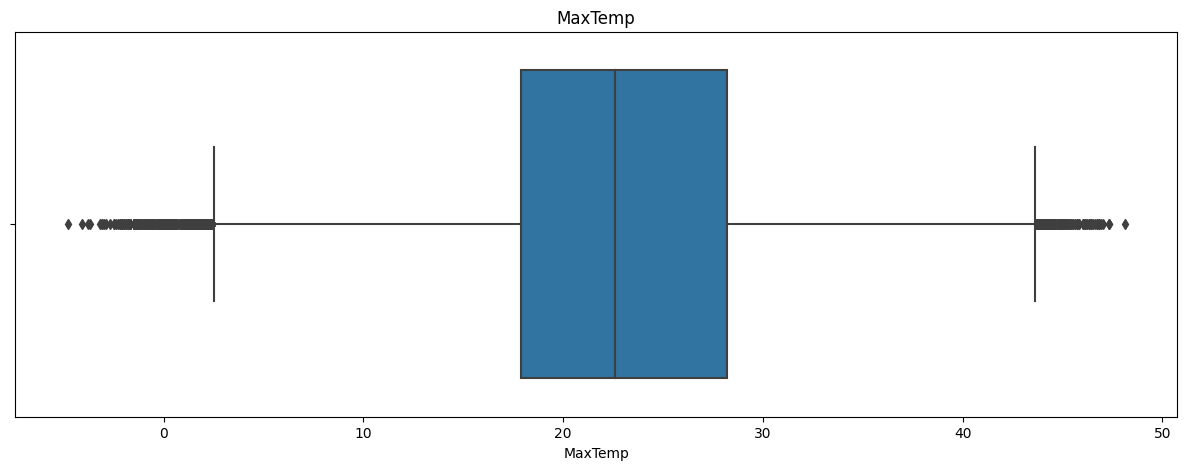

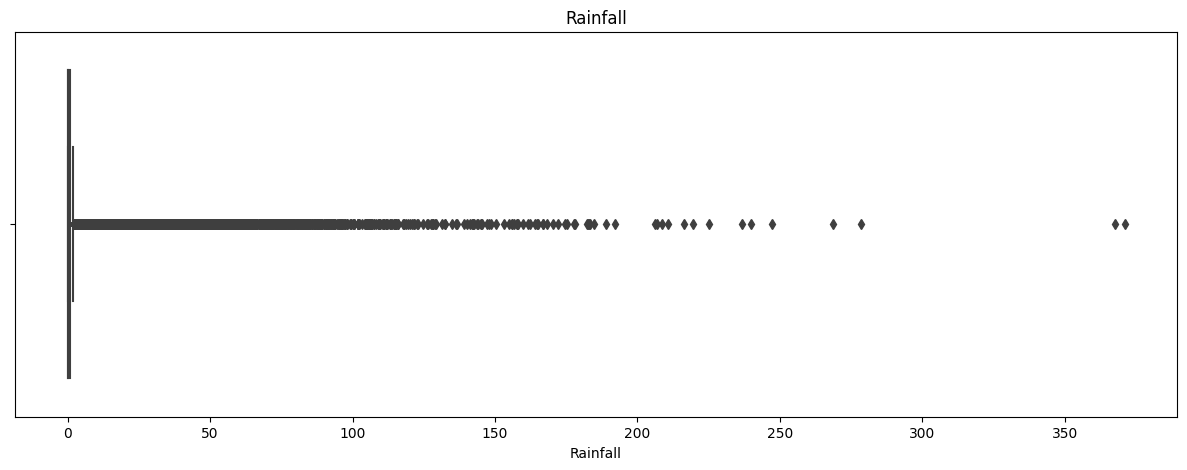

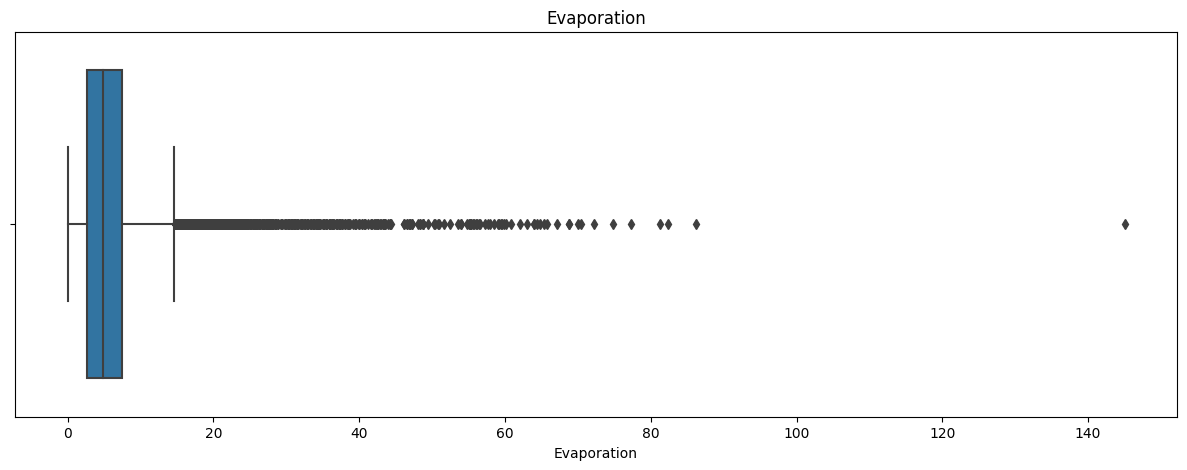

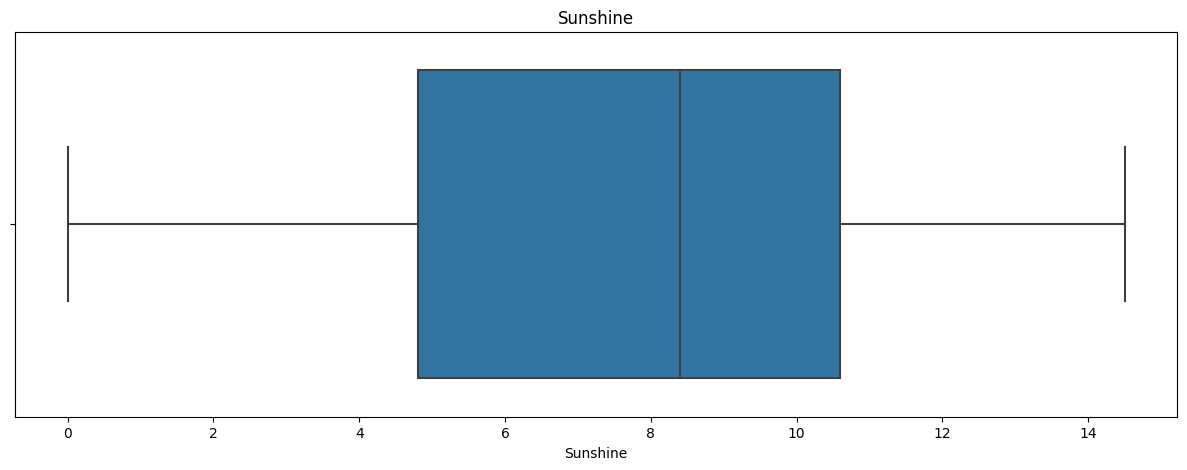

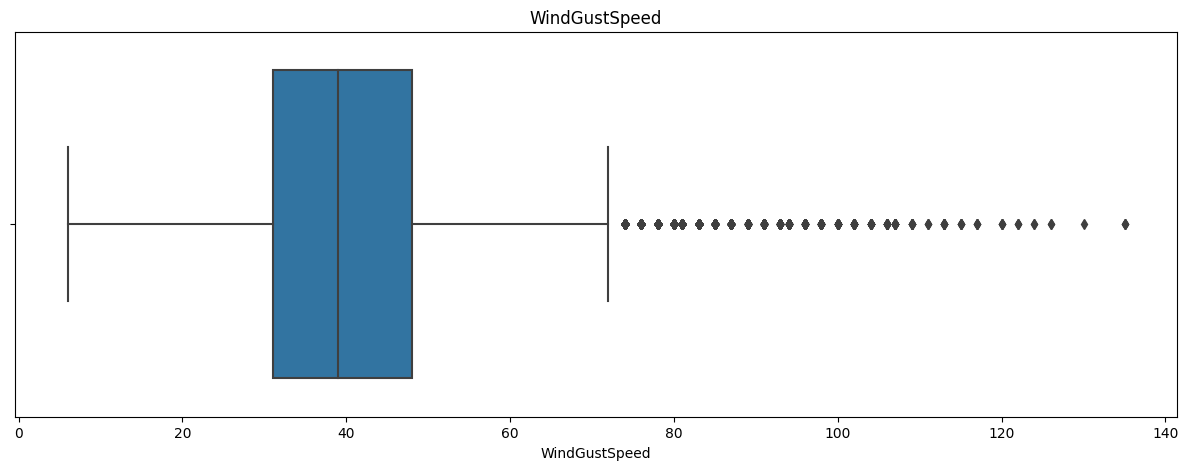

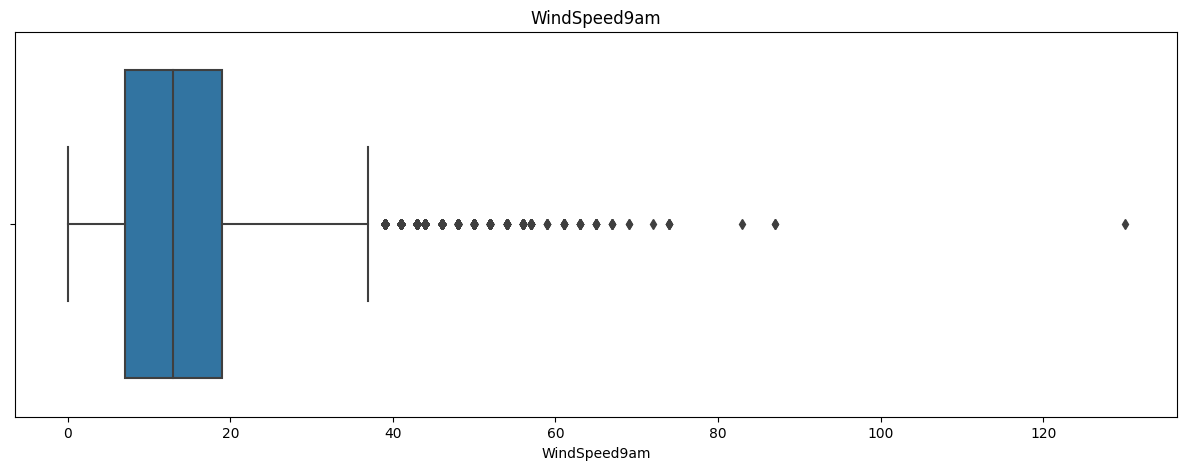

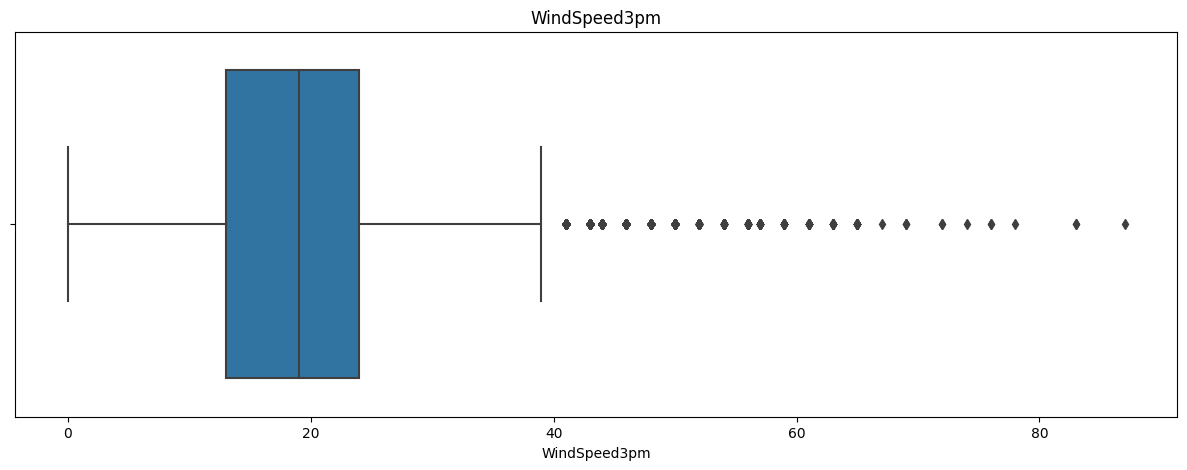

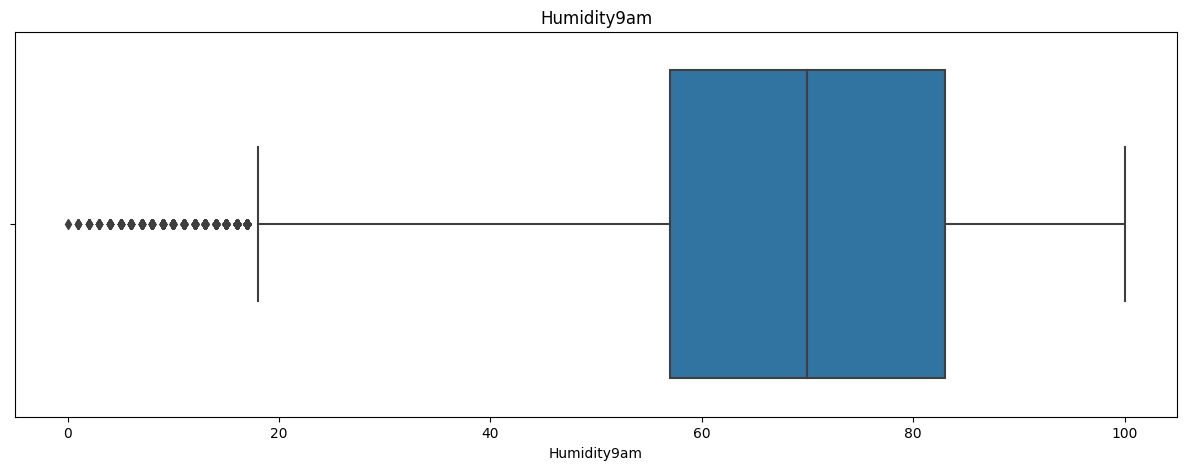

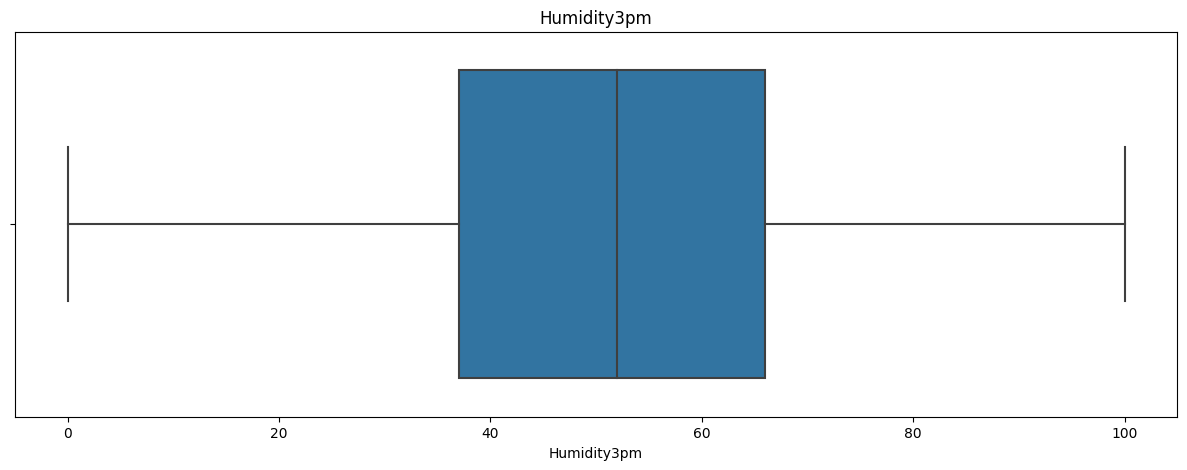

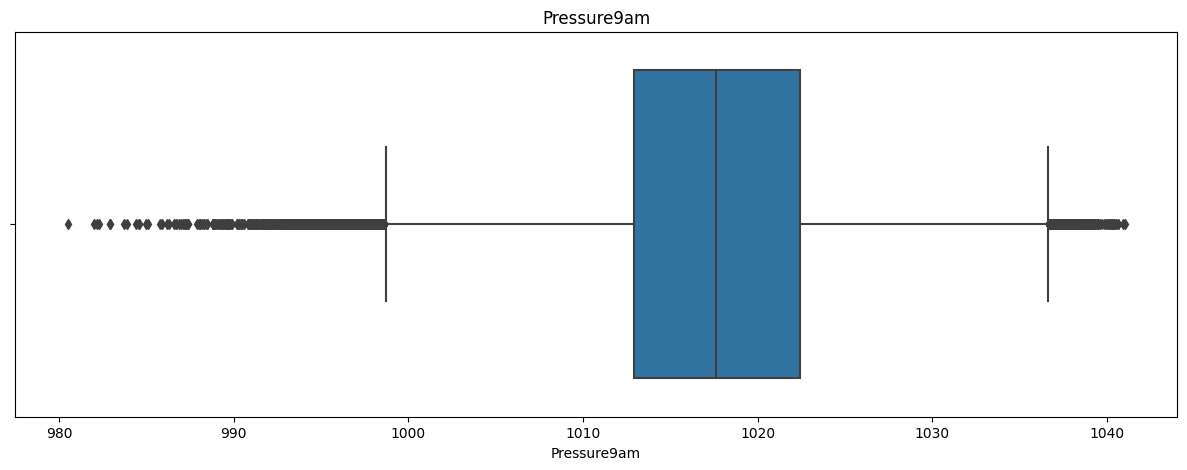

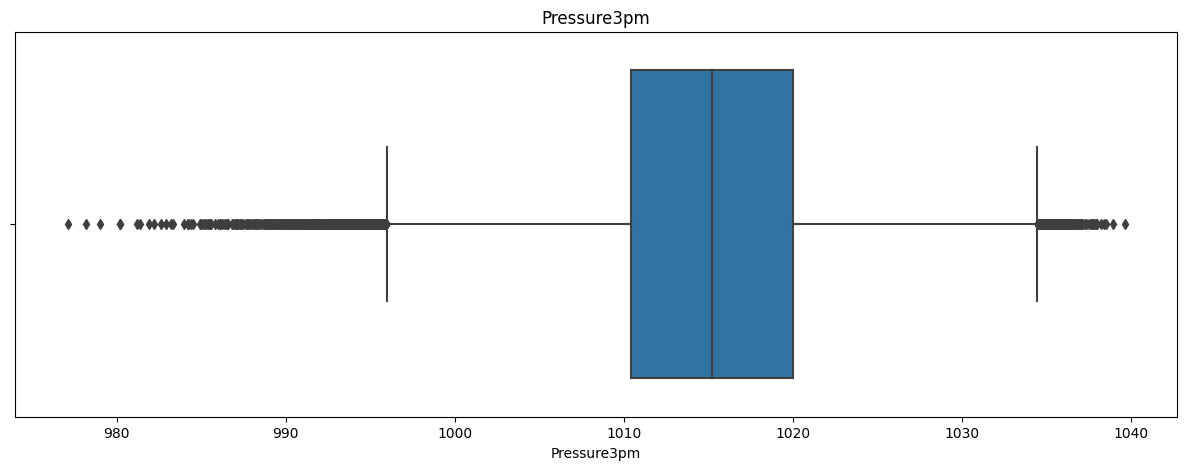

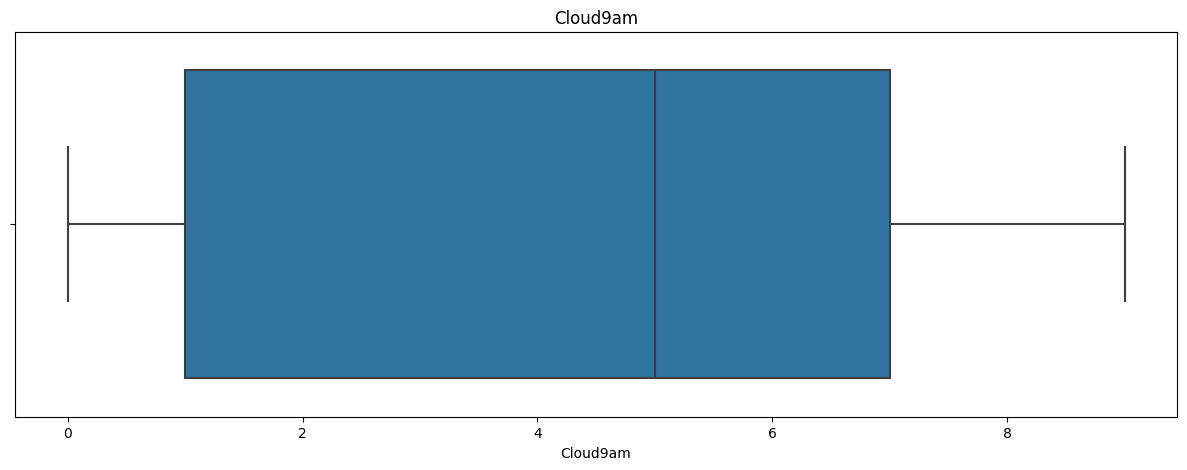

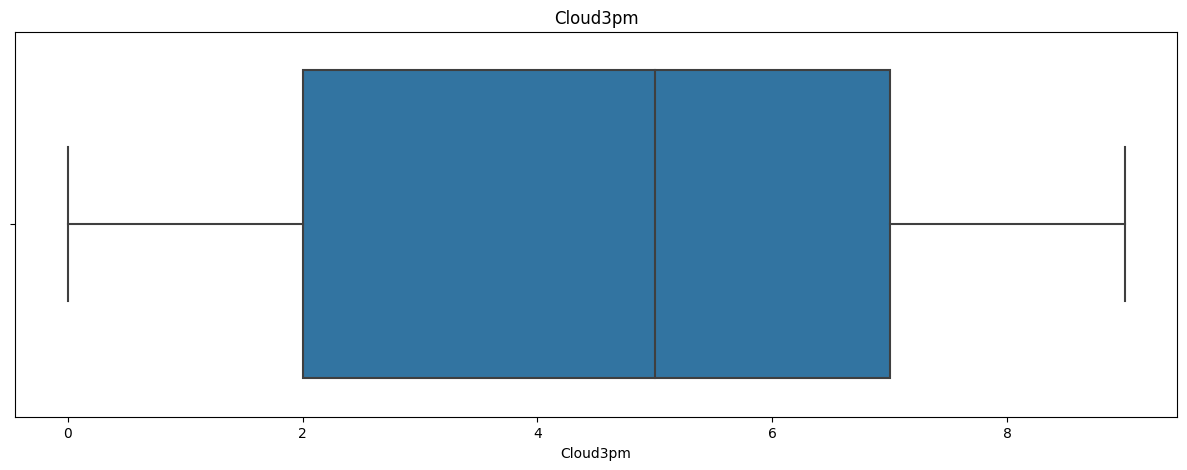

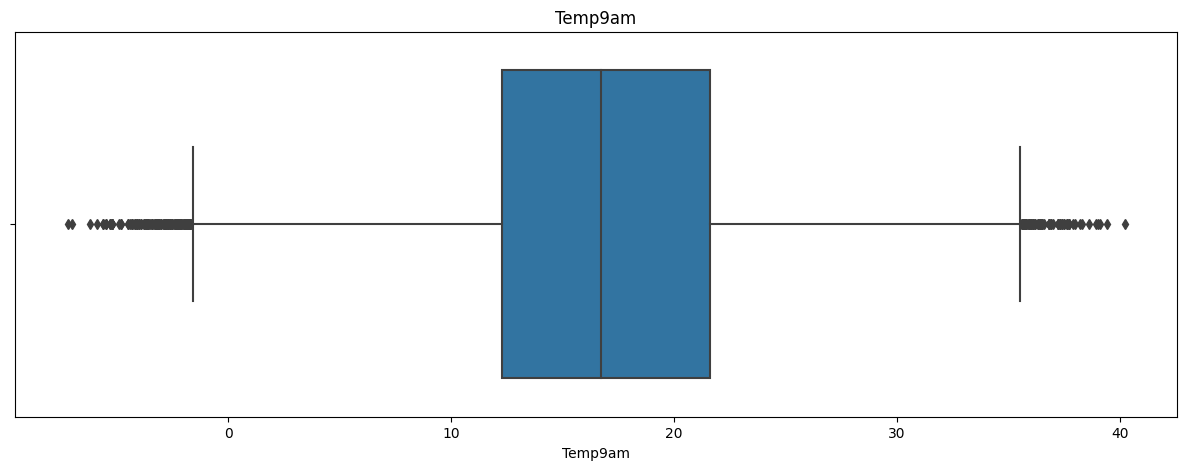

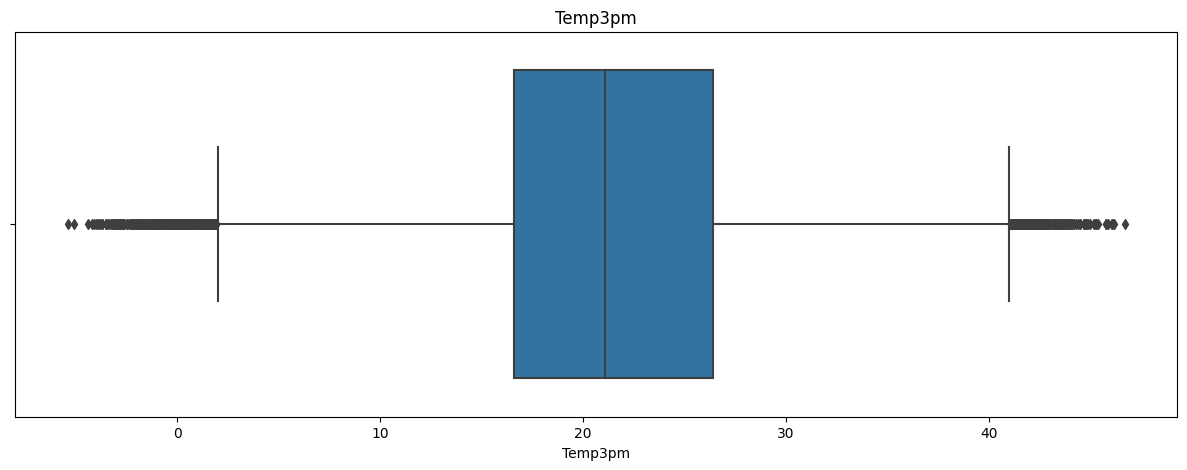

In [14]:
for i in w_df[numerical]:
    plt.figure(figsize=(15,5))
    plt.title(i)
    ax = sns.boxplot(x=w_df[numerical][i])

 check the data distribution for the Numericals Variables

Text(0, 0.5, 'RainTomorrow')

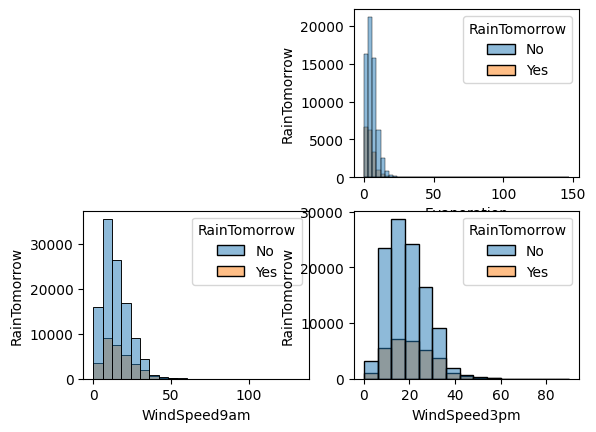

In [15]:


plt.subplot(2, 2, 2)
rana2 = w_df[['Evaporation','RainTomorrow']]
fig = sns.histplot(data=rana2, x="Evaporation", binwidth=3,hue="RainTomorrow")

fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
rana3 = w_df[['WindSpeed9am','RainTomorrow']]

fig = sns.histplot(data=rana3, x="WindSpeed9am", binwidth=6,hue="RainTomorrow")
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
rana4 = w_df[['WindSpeed3pm','RainTomorrow']]
fig = sns.histplot(data=rana4, x="WindSpeed3pm", binwidth=6,hue="RainTomorrow")
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')


Text(0, 0.5, 'RainTomorrow')

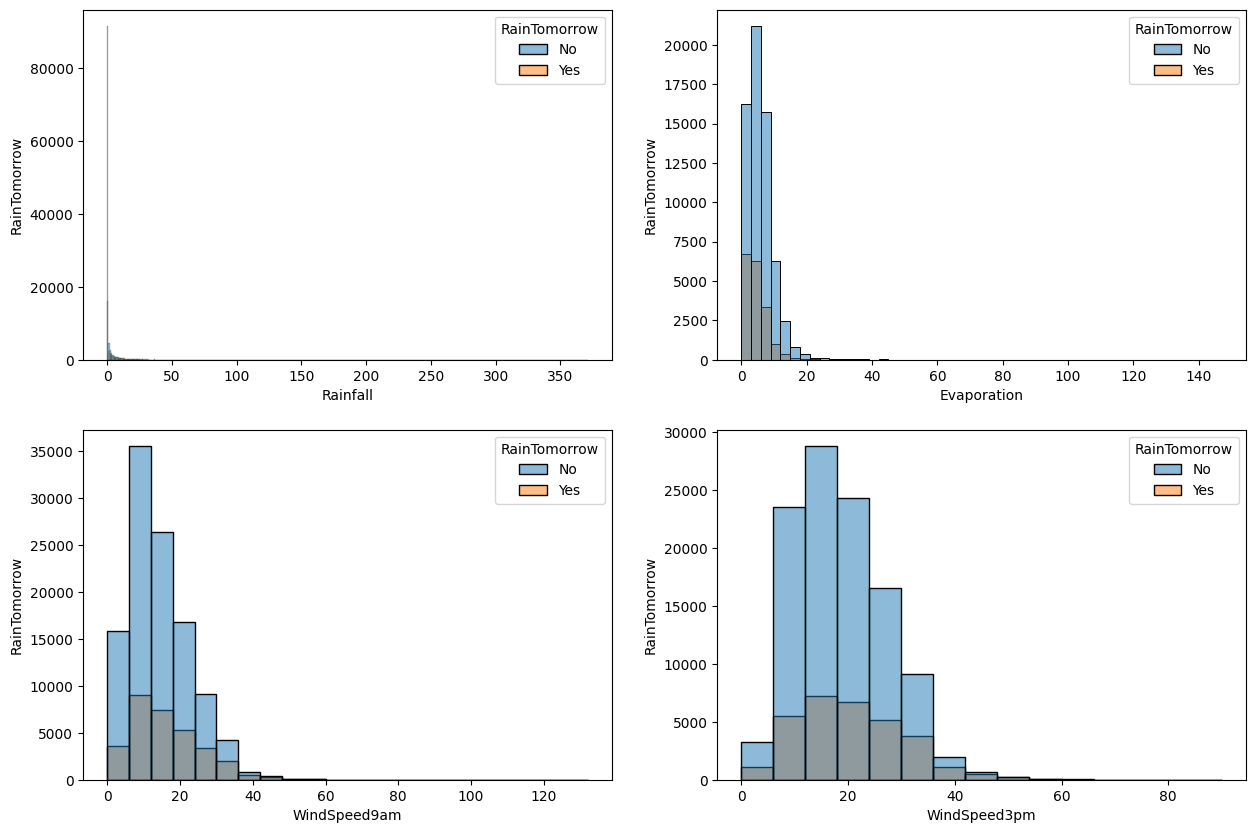

In [16]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
rana43 = w_df[['Rainfall','RainTomorrow']]

fig = sns.histplot(data=rana43, x="Rainfall", binwidth=1,hue="RainTomorrow")

fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
rana2 = w_df[['Evaporation','RainTomorrow']]
fig = sns.histplot(data=rana2, x="Evaporation", binwidth=3,hue="RainTomorrow")

fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
rana3 = w_df[['WindSpeed9am','RainTomorrow']]

fig = sns.histplot(data=rana3, x="WindSpeed9am", binwidth=6,hue="RainTomorrow")
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
rana4 = w_df[['WindSpeed3pm','RainTomorrow']]

fig = sns.histplot(data=rana4, x="WindSpeed3pm", binwidth=6,hue="RainTomorrow")
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')


In [17]:
IQR = w_df.Rainfall.quantile(0.75) - w_df.Rainfall.quantile(0.25)
Lower_fence = w_df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = w_df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers values falls < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# find outliers for Evaporation variable
IQR = w_df.Evaporation.quantile(0.75) - w_df.Evaporation.quantile(0.25)
Lower_fence = w_df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = w_df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers values falls < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


# find outliers for WindSpeed9am variable
IQR = w_df.WindSpeed9am.quantile(0.75) - w_df.WindSpeed9am.quantile(0.25)
Lower_fence = w_df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = w_df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers values falls < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


# find outliers for WindSpeed3pm variable
IQR = w_df.WindSpeed3pm.quantile(0.75) - w_df.WindSpeed3pm.quantile(0.25)
Lower_fence = w_df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = w_df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers values falls < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers values falls < -2.4000000000000004 or > 3.2
Evaporation outliers values falls < -11.800000000000002 or > 21.800000000000004
WindSpeed9am outliers values falls < -29.0 or > 55.0
WindSpeed3pm outliers values falls < -20.0 or > 57.0


In [18]:
def max_value(df3, feature, top):
    return np.where(df3[feature]>top, top, df3[feature])

for df3 in [w_df]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

Text(0, 0.5, 'RainTomorrow')

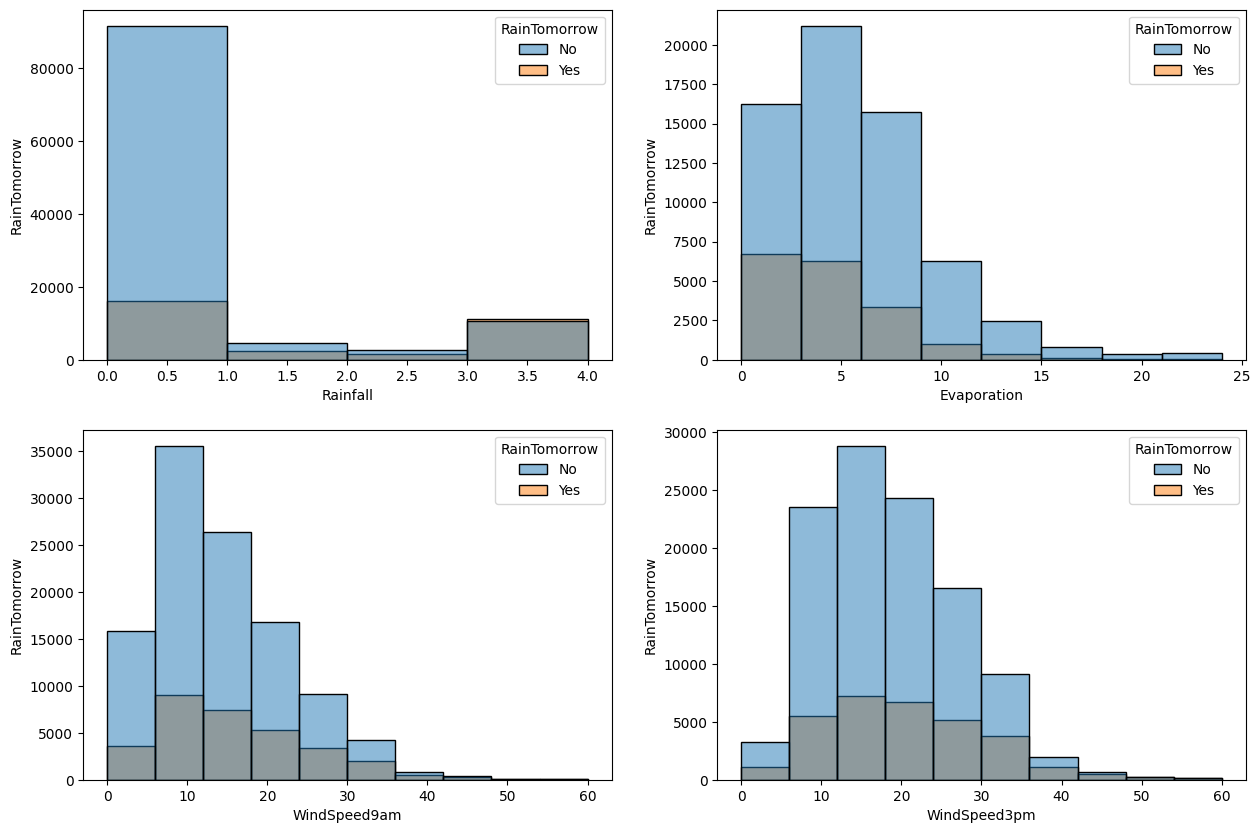

In [19]:

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
rana43 = w_df[['Rainfall','RainTomorrow']]

fig = sns.histplot(data=rana43, x="Rainfall", binwidth=1,hue="RainTomorrow")

fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
rana2 = w_df[['Evaporation','RainTomorrow']]
fig = sns.histplot(data=rana2, x="Evaporation", binwidth=3,hue="RainTomorrow")

fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
rana3 = w_df[['WindSpeed9am','RainTomorrow']]

fig = sns.histplot(data=rana3, x="WindSpeed9am", binwidth=6,hue="RainTomorrow")
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
rana4 = w_df[['WindSpeed3pm','RainTomorrow']]

fig = sns.histplot(data=rana4, x="WindSpeed3pm", binwidth=6,hue="RainTomorrow")
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

Missing values in Numerical

In [20]:
numerical = [col for col in w_df.columns if w_df[col].dtypes != 'O']


In [21]:
w_df[numerical].isnull().sum()


MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

In [22]:
for col in numerical:
    if w_df[col].isnull().mean()>0:
        print(col, round(w_df[col].isnull().mean(),4))

MinTemp 0.0102
MaxTemp 0.0087
Rainfall 0.0224
Evaporation 0.4317
Sunshine 0.4801
WindGustSpeed 0.0706
WindSpeed9am 0.0121
WindSpeed3pm 0.0211
Humidity9am 0.0182
Humidity3pm 0.031
Pressure9am 0.1036
Pressure3pm 0.1033
Cloud9am 0.3842
Cloud3pm 0.4081
Temp9am 0.0121
Temp3pm 0.0248


In [23]:
for df1 in [w_df]:
    for col in numerical:
        col_median=w_df[col].median()
        df1[col].fillna(col_median, inplace=True)           


In [24]:
w_df[numerical].isnull().sum()


MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [25]:

categorical = [var for var in w_df.columns if w_df[var].dtype=='O']

print('We have {} Categorical Variables.\n'.format(len(categorical)))

print('Categorical Variables:', categorical)

# view the categorical variables

w_df[categorical].nunique()

We have 6 Categorical Variables.

Categorical Variables: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Location        49
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
dtype: int64

In [26]:
w_df[categorical].isnull().mean()


Location        0.000000
WindGustDir     0.070989
WindDir9am      0.072639
WindDir3pm      0.029066
RainToday       0.022419
RainTomorrow    0.022460
dtype: float64

In [27]:
for col in categorical:
    if w_df[col].isnull().mean()>0:
        print(col, (w_df[col].isnull().mean()))

WindGustDir 0.0709885879279527
WindDir9am 0.07263852605527293
WindDir3pm 0.02906641000962464
RainToday 0.022418534304963565
RainTomorrow 0.02245978275814657


In [28]:
for df2 in [w_df]:
    df2['WindGustDir'].fillna(w_df['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(w_df['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(w_df['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(w_df['RainToday'].mode()[0], inplace=True)

Encoding Categorical Variables¶


In [29]:
w_df[categorical].nunique()


Location        49
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
dtype: int64

In [30]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

w_df = encoder.fit_transform(w_df)

w_df = w_df.dropna()
w_df = w_df.reset_index()
w_df = w_df.drop('index',axis=1)
w_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,...,8.0,5.0,16.9,21.8,0,1,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,...,5.0,5.0,17.2,24.3,0,1,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,...,5.0,2.0,21.0,23.2,0,1,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,...,5.0,5.0,18.1,26.5,0,1,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,0,1,No,2008,12,5


In [31]:
df_nonull = pd.concat([w_df[numerical], w_df[['RainToday_0', 'RainToday_1','RainTomorrow']],
                    pd.get_dummies(w_df.Location), 
                    pd.get_dummies(w_df.WindGustDir),
                    pd.get_dummies(w_df.WindDir9am),
                    pd.get_dummies(w_df.WindDir3pm)], axis=1)

In [32]:
df_nonull

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,4.8,8.4,31.0,15.0,13.0,59.0,27.0,...,0,0,0,0,0,0,0,0,0,0
142189,2.8,23.4,0.0,4.8,8.4,31.0,13.0,11.0,51.0,24.0,...,0,0,0,0,0,0,0,0,0,0
142190,3.6,25.3,0.0,4.8,8.4,22.0,13.0,9.0,56.0,21.0,...,0,0,0,0,0,0,0,0,0,0
142191,5.4,26.9,0.0,4.8,8.4,37.0,9.0,9.0,53.0,24.0,...,0,0,0,0,0,0,0,0,1,0


Splitting Features and Target variables 

In [35]:
X = df_nonull.drop(['RainTomorrow'], axis=1)
y = df_nonull['RainTomorrow']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [37]:
from sklearn.preprocessing import MinMaxScaler

#Scaling using MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression


# Initiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the logistic regression model to the training data 
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [44]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [45]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8455


In [46]:
y_pred_train = logreg.predict(X_train)

print('Training Set Accuracy Score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training Set Accuracy Score: 0.8483


Checking for overfitting and underfitting


In [47]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8483
Test set score: 0.8455


In [48]:
from sklearn import metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.94      0.90     22098
         Yes       0.71      0.51      0.60      6341

    accuracy                           0.85     28439
   macro avg       0.79      0.73      0.75     28439
weighted avg       0.84      0.85      0.84     28439

